### Load important libraries and set presets for visualization

---


In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Set display and visualization settings
pd.set_option("display.float_format", lambda x: "%.3f" % x)
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = [10, 5]


### Load Data and Show Summary Statistics

---


In [129]:
# %%

# Load the data
df = pd.read_csv("Burnout.csv")
df.head()

,Timestamp,Do you grant your consent to participate in this survey?,Gender,Age,Kindly select your university of study,Level,Religion,Location,Ethnicity,Study's financing,...,I have become less interested in my studies since my enrollment at the school.,I have become less enthusiastic about my studies.,I have become more cynical about the potential usefulness of my studies.,I doubt the significance of my studies.,I can effectively solve the problems that arise in my studies.,I believe that I make an effective contribution to the classes that I attend.,"In my opinion, I am a good student.",I have learned many interesting things during the course of my studies.,I feel stimulated when I achieve my study goals.,During class I feel confident that I am effective in getting things done.
0,2024/07/16 12:19:19 PM PDT,Yes,Female,21 - 23,UG,400,Cristian,Off Campus,Ga,Family,...,6,6,6,0,6,6,6,6,6,6
1,2024/07/16 12:23:35 PM PDT,Yes,Male,21 - 23,COHk,300,Cristian,Off Campus,Others,Family,...,3,3,3,3,3,3,3,3,3,3
2,2024/07/16 12:26:52 PM PDT,Yes,Male,24 - 27,COHk,300,Cristian,Off Campus,Others,Family,...,0,6,0,0,3,2,6,6,6,6
3,2024/07/16 12:37:54 PM PDT,Yes,Male,21 - 23,COHk,300,Muslim,Off Campus,Others,Family,...,6,6,6,6,3,3,0,6,6,6
4,2024/07/16 12:38:43 PM PDT,Yes,Male,21 - 23,COHk,300,Cristian,Off Campus,Akan,Family,...,3,1,2,3,3,2,6,6,5,6


In [130]:
# Explore distribution by university
df["Kindly select your university of study"].value_counts()

Kindly select your university of study
COHk    100
UG       79
UCC      71
UHAS     65
UDS      60
Name: count, dtype: int64

In [131]:
# remane "Kindly select your university of study" to "University" for consistency

df["Kindly select your university of study"].value_counts()

# rename "Kindly select your university of study" to "University" to "University"
df.rename(
    columns={"Kindly select your university of study": "University"}, inplace=True
)

In [132]:
# Convert Level to categorical
df["Level"] = df["Level"].astype("object")

In [133]:
# Display information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 27 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Timestamp                                                                       375 non-null    object
 1   Do you grant your consent to participate in this survey?                        375 non-null    object
 2   Gender                                                                          375 non-null    object
 3   Age                                                                             375 non-null    object
 4   University                                                                      375 non-null    object
 5   Level                                                                           375 non-null    object
 6   Religion                  

In [134]:
# %%

# Descriptive statistics
df.describe()

,I feel emotionally drained by my studies.,I feel used up at the end of a day at school.,I feel like my courses are breaking me down.,I feel frustrated by my course activities.,I feel studying or attending a class is really a strain on me.,I have become less interested in my studies since my enrollment at the school.,I have become less enthusiastic about my studies.,I have become more cynical about the potential usefulness of my studies.,I doubt the significance of my studies.,I can effectively solve the problems that arise in my studies.,I believe that I make an effective contribution to the classes that I attend.,"In my opinion, I am a good student.",I have learned many interesting things during the course of my studies.,I feel stimulated when I achieve my study goals.,During class I feel confident that I am effective in getting things done.
count,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000,375.000
mean,4.973,4.845,4.923,4.859,5.024,2.595,2.560,2.443,2.339,4.371,4.293,4.360,4.357,4.424,4.459
std,1.504,1.413,1.445,1.458,1.458,1.977,1.846,1.913,2.088,1.739,1.523,1.504,1.579,1.568,1.633
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.000,4.000,4.000,4.000,4.000,1.000,1.000,1.000,0.000,3.000,3.000,3.000,3.000,3.000,3.000
50%,6.000,5.000,6.000,5.000,6.000,3.000,2.000,2.000,2.000,5.000,5.000,5.000,5.000,5.000,5.000
75%,6.000,6.000,6.000,6.000,6.000,3.000,4.000,3.000,3.000,6.000,5.000,6.000,6.000,6.000,6.000
max,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000


In [142]:
# Check for missing values in dataframe with column and number of missing values

def check_missing_values(df):
    if df.isnull().sum().sum() == 0:
        print("No missing values")
    else:
        # show number of missing values as a dataframe by column
        missing_values = df.isnull().sum()
        missing_values = missing_values[missing_values > 0]
        missing_values = missing_values.sort_values(ascending=False)
        missing_values = missing_values.reset_index()
        missing_values.columns = ["Feature", "Missing Values"]
        missing_values


check_missing_values(df)

No missing values


### Distributions of Numerical and Categorical Features

---


In [136]:
numerical_vars = df.select_dtypes(include=["float64", "int64"]).columns
categorical_vars = df.select_dtypes(include=["object"]).columns

print(f"Numerber of numerical variables: {len(numerical_vars)}")
print(f"Numerber of categorical variables: {len(categorical_vars)}")

Numerber of numerical variables: 15
Numerber of categorical variables: 12


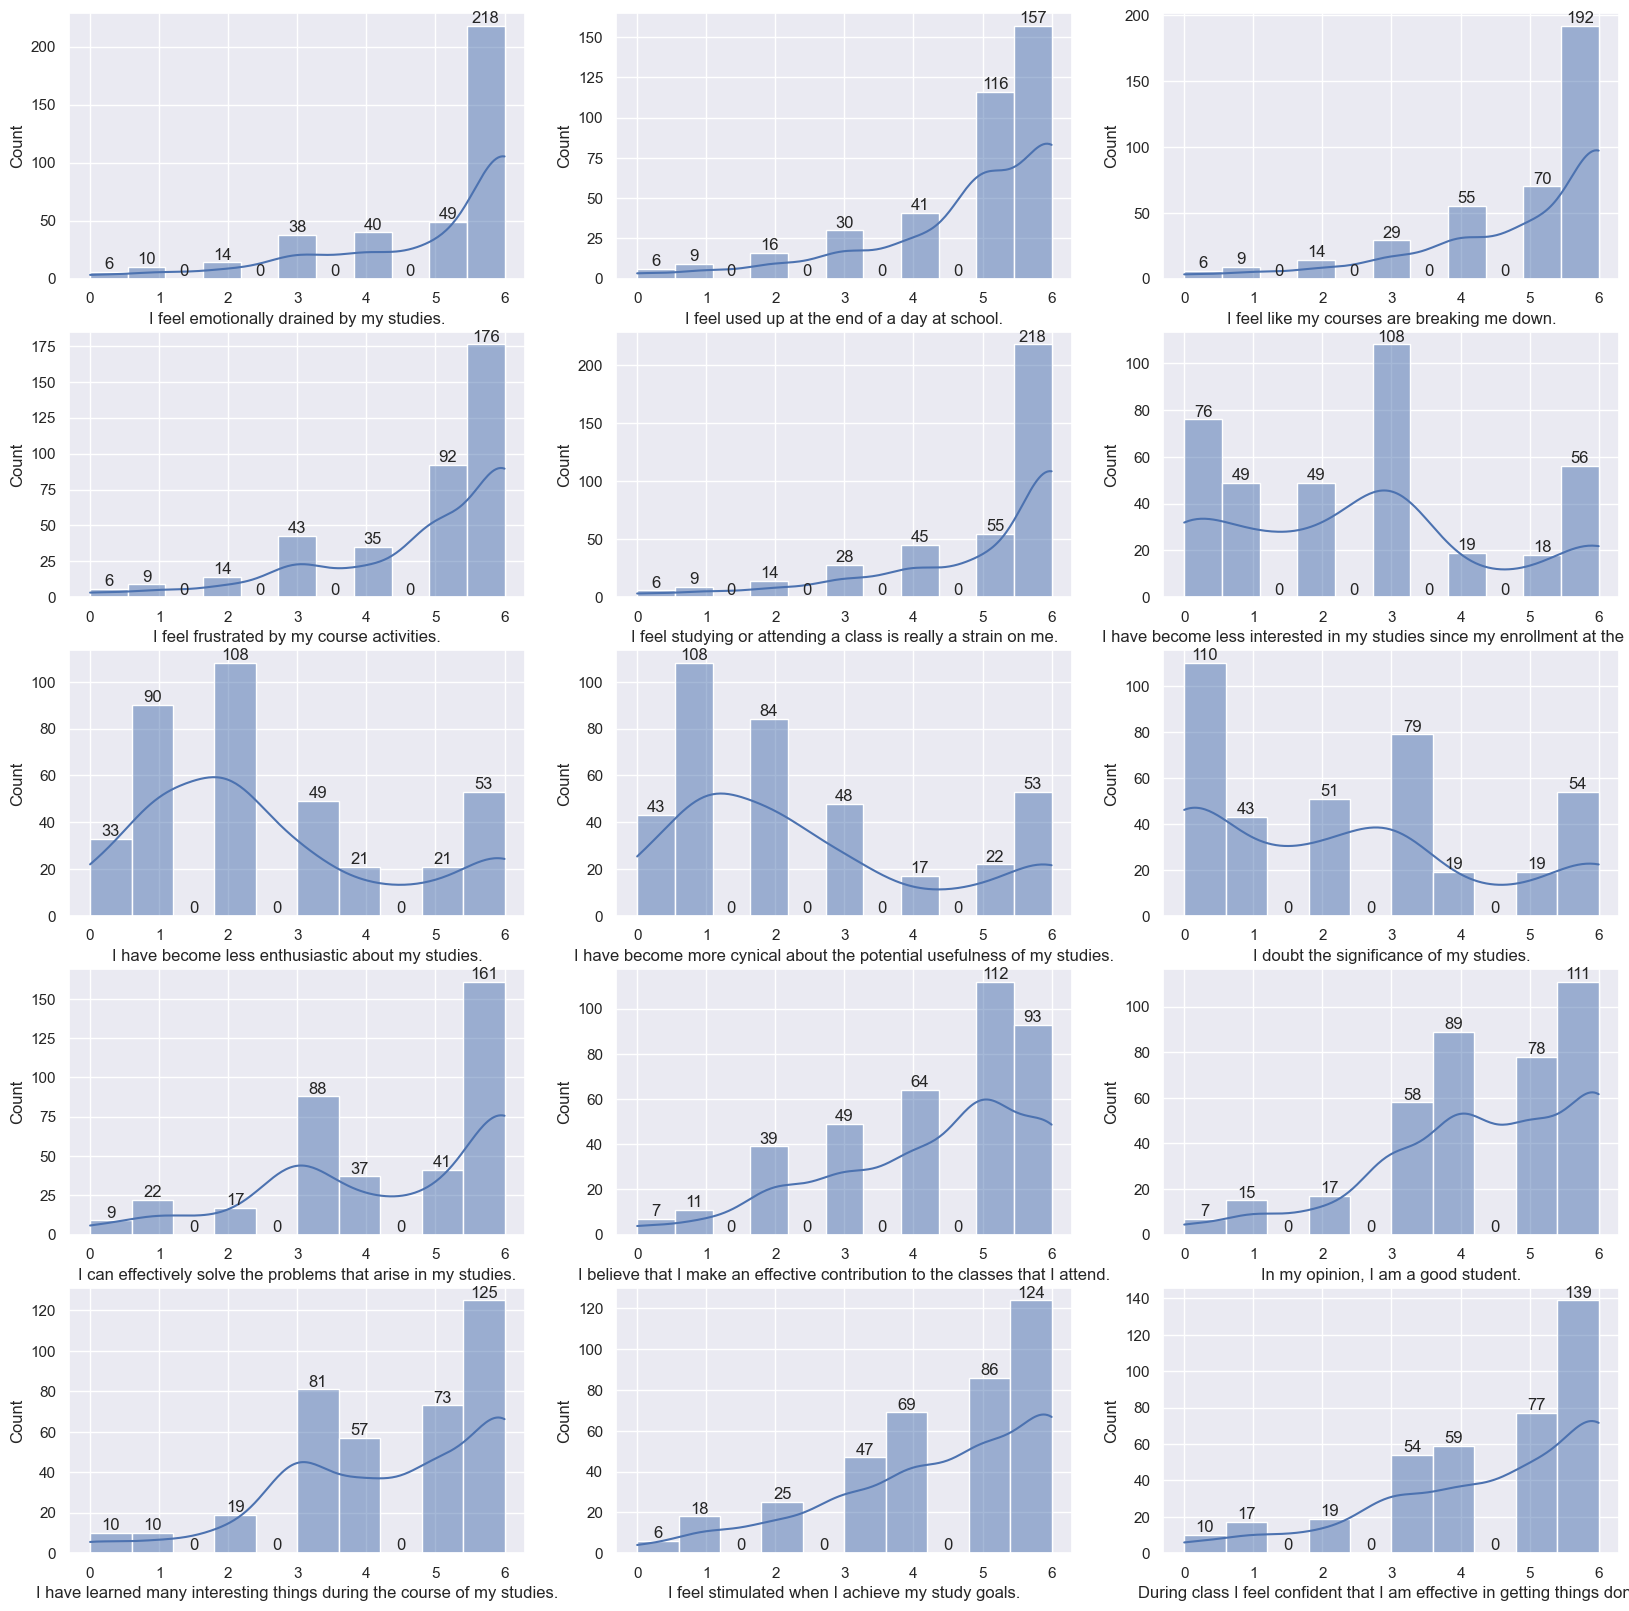

In [148]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_vars):
        sns.histplot(df[numerical_vars[i]], ax=ax, kde=True)
        ax.bar_label(ax.containers[0], fmt="%.0f", label_type="edge")
        # ax.set_title(f"Histogram of {numerical_vars[i]}")

### Distribution of Categorical Variables
---

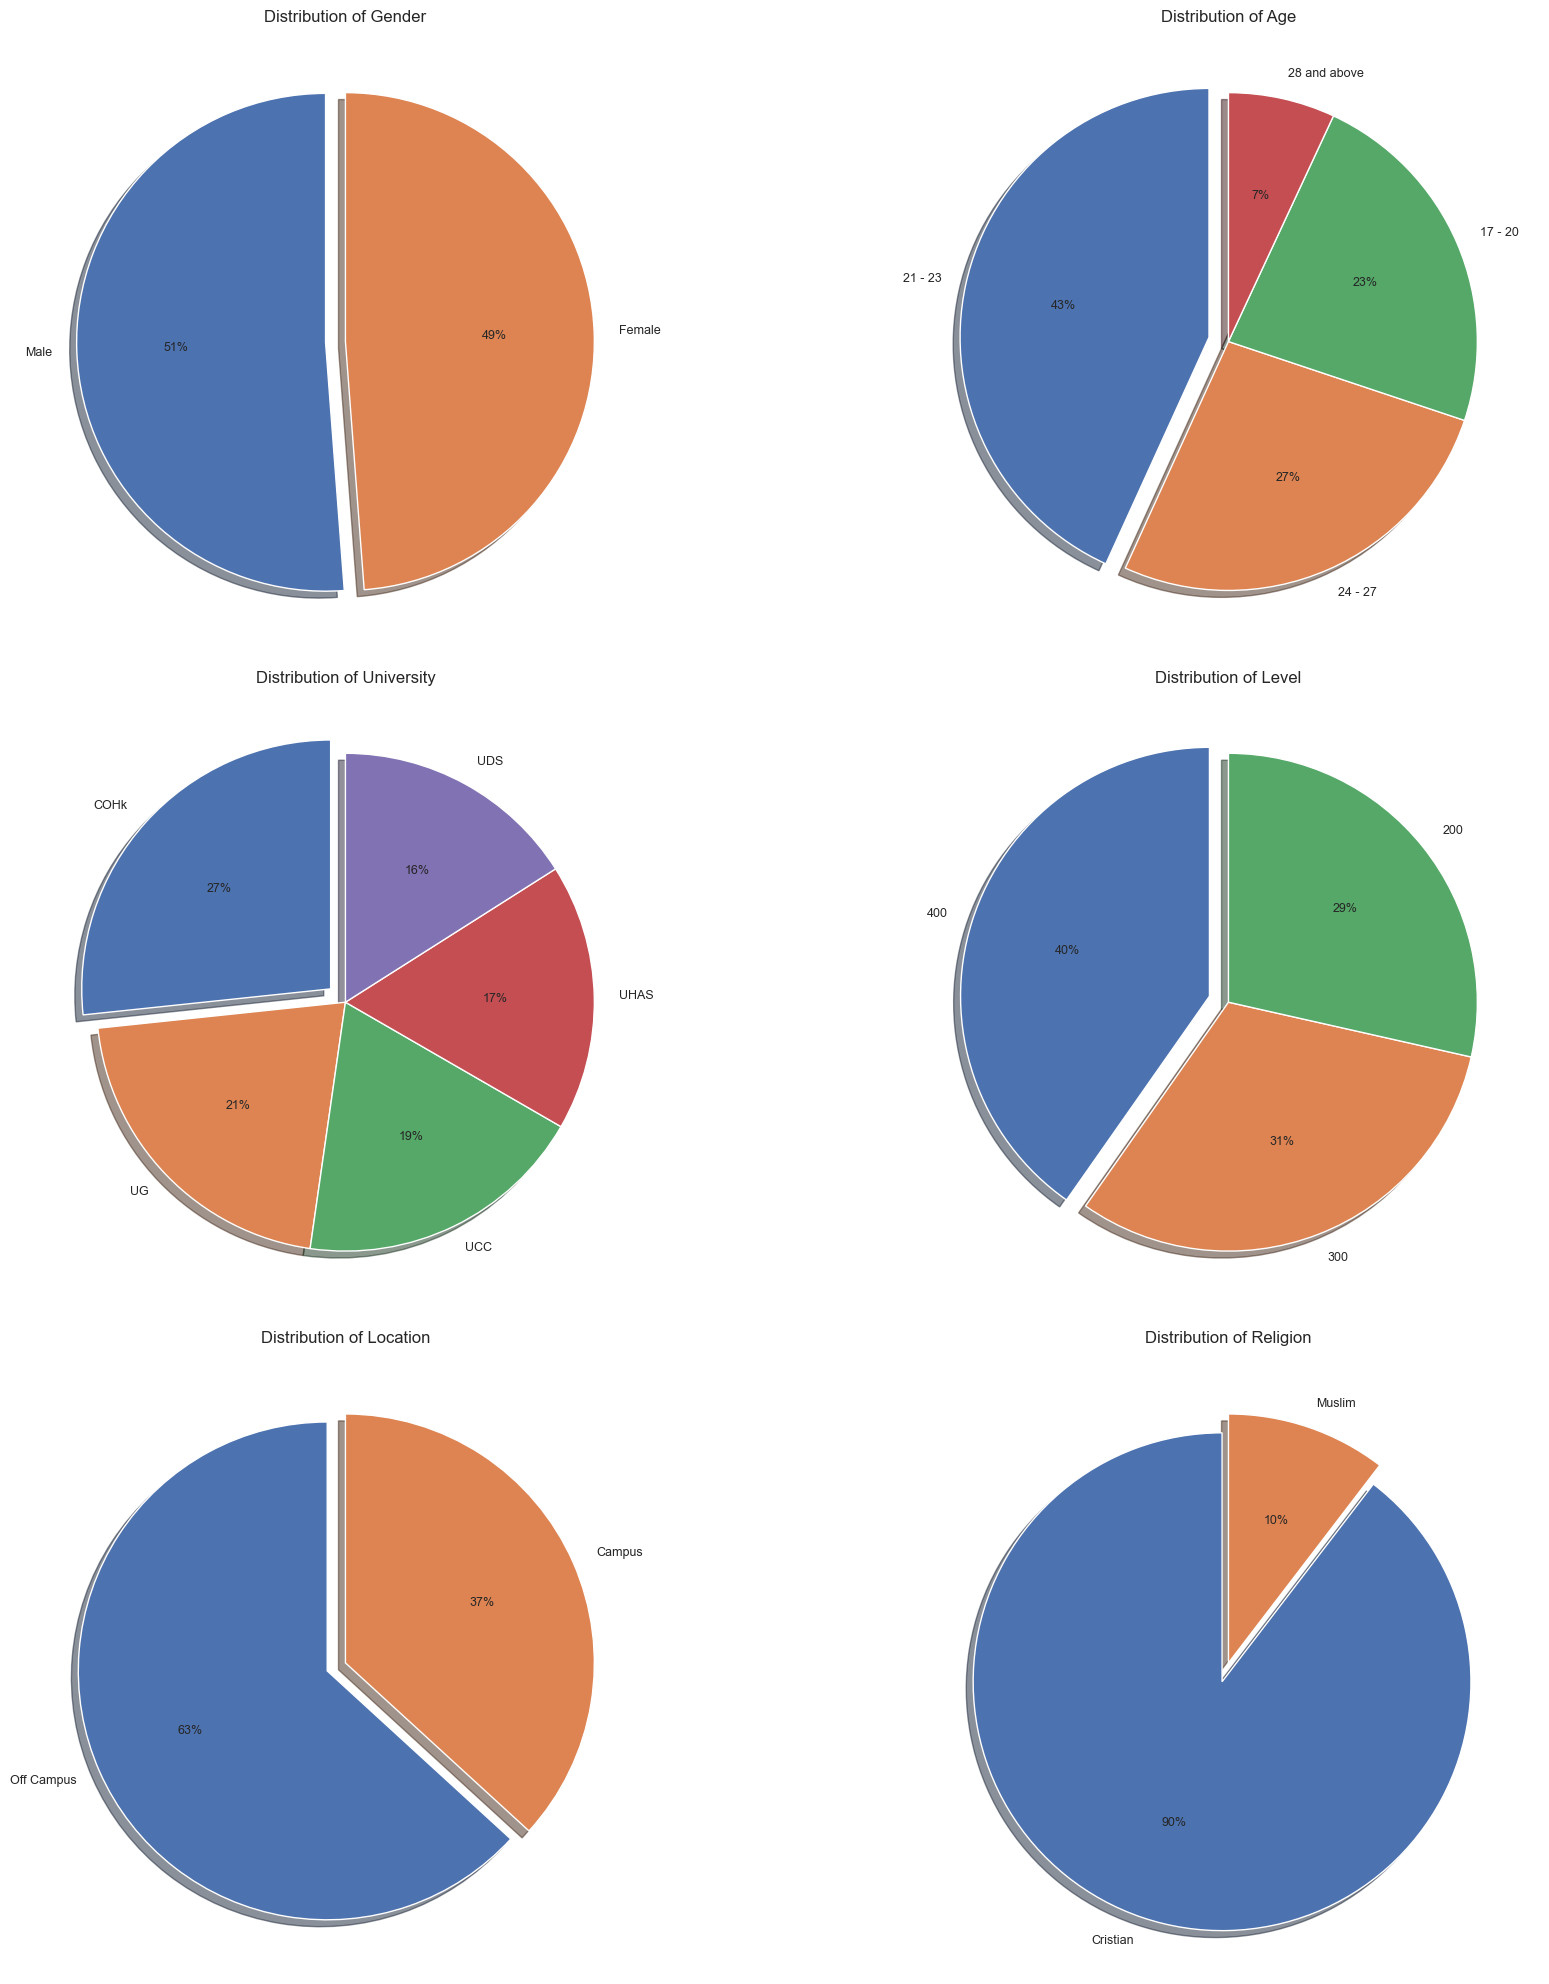

In [160]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# GAULR
categorical_vars = ['Gender','Age','University','Level','Location','Religion']
cc = ["magma", "viridis", "cividis", "magma"]

for i, ax in enumerate(axes.flatten()):
    # Count the occurrences of each category
    count_data = df[categorical_vars[i]].value_counts().sort_values(ascending=False)
    # Create pie chart
    n = count_data.shape[0]
    wedges, texts, autotexts = ax.pie(
        count_data,
        labels=count_data.index,
        autopct="%.0f%%",
        # colors=sns.color_palette(n_colors=n, palette=cc[i]),
        startangle=90,
        textprops={"fontsize": 9},
        explode=[0.08] + [0] * (n - 1),
        shadow=True,
    )
    ax.set(title=f"Distribution of {categorical_vars[i]}")

plt.tight_layout()
plt.show()  

### Calculate Burnout Scores

---


In [161]:
# %%

# Define burnout score categories

# Emotional Exhaustion (EE) Score
ee_columns = [
    "I feel emotionally drained by my studies.",
    "I feel used up at the end of a day at school.",
    "I feel like my courses are breaking me down.",
    "I feel frustrated by my course activities.",
    "I feel studying or attending a class is really a strain on me.",
]

# Cynicism (CY) Score
cy_columns = [
    "I have become less interested in my studies since my enrollment at the school.",
    "I have become less enthusiastic about my studies.",
    "I have become more cynical about the potential usefulness of my studies.",
    "I doubt the significance of my studies.",
]

# Academic Efficacy (AE) Score
ae_columns = [
    "I can effectively solve the problems that arise in my studies.",
    "I believe that I make an effective contribution to the classes that I attend.",
    "In my opinion, I am a good student.",
    "I have learned many interesting things during the course of my studies.",
    "I feel stimulated when I achieve my study goals.",
    "During class I feel confident that I am effective in getting things done.",
]

# Calculate burnout scores
df["EE_Score"] = df[ee_columns].mean(axis=1)
df["CY_Score"] = df[cy_columns].mean(axis=1)
df["AE_Score"] = df[ae_columns].mean(axis=1)

# Reverse AE_Score (as it measures reduced personal accomplishment)
df["AE_Score"] = 6 - df["AE_Score"]

# Calculate the overall burnout score
df["Burnout_Score"] = 0.4 * df["EE_Score"] + 0.3 * df["CY_Score"] + 0.3 * df["AE_Score"]

# Display summary statistics for burnout scores
print(df[["EE_Score", "CY_Score", "AE_Score", "Burnout_Score"]].describe())

       EE_Score  CY_Score  AE_Score  Burnout_Score
count   375.000   375.000   375.000        375.000
mean      4.925     2.484     1.623          3.202
std       1.400     1.820     1.407          0.649
min       0.000     0.000     0.000          1.500
25%       4.400     1.500     0.500          2.772
50%       5.600     1.500     1.333          3.100
75%       6.000     3.125     2.500          3.515
max       6.000     6.000     6.000          5.550


In [163]:
df[['EE_Score', 'CY_Score', 'AE_Score', 'Burnout_Score']].head()

,EE_Score,CY_Score,AE_Score,Burnout_Score
0,6.000,4.500,0.000,3.750
1,3.000,3.000,3.000,3.000
2,6.000,1.500,1.167,3.200
3,6.000,6.000,2.000,4.800
4,6.000,2.250,1.333,3.475


### Distribution of Burnout Scores

---


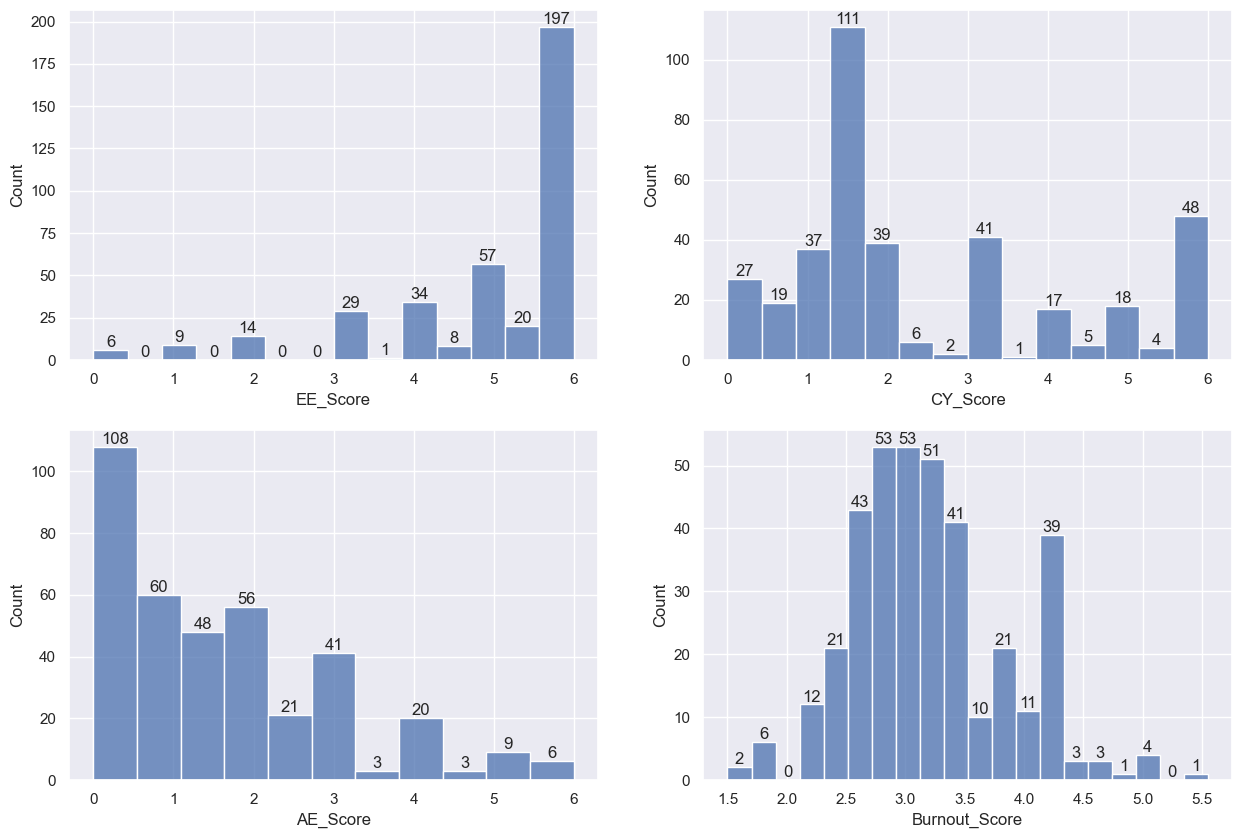

In [174]:
# Plot the distribution of burnout scores
scores = ["EE_Score", "CY_Score", "AE_Score", "Burnout_Score"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_vars):
        sns.histplot(df[scores[i]], ax=ax)
        ax.bar_label(ax.containers[0], fmt="%.0f", label_type="edge")
        # ax.set_title(f"Histogram of {scores[i]}")

### Burnout Prevalence and Demographic Summary

---


In [175]:
# Define burnout threshold (adjust based on your specific criteria)
burnout_threshold = 3.0

# Calculate and display burnout prevalence
burnout_prevalence = (df["Burnout_Score"] >= burnout_threshold).mean()
print(f"Overall burnout prevalence: {burnout_prevalence:.2%}")

# Summarize demographic information
print(df["Gender"].value_counts(normalize=True))
print(df["Age"].value_counts(normalize=True))
print(df["University"].value_counts(normalize=True))
print(df["Level"].value_counts(normalize=True))
print(df["Religion"].value_counts(normalize=True))

Overall burnout prevalence: 59.20%
Gender
Male     0.512
Female   0.488
Name: proportion, dtype: float64
Age
21 - 23        0.432
24 - 27        0.267
17 - 20        0.232
28 and above   0.069
Name: proportion, dtype: float64
University
COHk   0.267
UG     0.211
UCC    0.189
UHAS   0.173
UDS    0.160
Name: proportion, dtype: float64
Level
400   0.403
300   0.312
200   0.285
Name: proportion, dtype: float64
Religion
Cristian   0.896
Muslim     0.104
Name: proportion, dtype: float64


In [ ]:
# Define burnout threshold
burnout_threshold = 3.0

# Calculate and display burnout prevalence
burnout_prevalence = (df["Burnout_Score"] >= burnout_threshold).mean()
print(f"Overall burnout prevalence: {burnout_prevalence:.2%}")

# Summarize demographic information
print(df["Gender"].value_counts(normalize=True))
print(df["Age"].value_counts(normalize=True))
print(df["University"].value_counts(normalize=True))  # added university
print(df["Level"].value_counts(normalize=True))
print(df["Religion"].value_counts(normalize=True))

Overall burnout prevalence: 59.20%
Gender
Male     0.512
Female   0.488
Name: proportion, dtype: float64
Age
21 - 23        0.432
24 - 27        0.267
17 - 20        0.232
28 and above   0.069
Name: proportion, dtype: float64
University
COHk   0.267
UG     0.211
UCC    0.189
UHAS   0.173
UDS    0.160
Name: proportion, dtype: float64
Level
400   0.403
300   0.312
200   0.285
Name: proportion, dtype: float64
Religion
Cristian   0.896
Muslim     0.104
Name: proportion, dtype: float64


### Structured Regression Summary Table
---


In [177]:
import pandas as pd

summary_tables = {}
for var, model in results.items():
    # Get the confidence interval at 95%
    # ci_lower, ci_upper = model.conf_int(alpha=0.05)

    # Calculate significance (using 0.05 as threshold, adjust as needed)
    significance = np.where(model.pvalues < 0.05, "*", "")

    # Create summary table with Coefficient, Std Error, t-value, p-value, and marked significance
    summary_table = pd.DataFrame(
        {
            "Coefficient": model.params,
            # "Std Error": model.bse,
            # "t-value": model.tvalues,
            "p-value": model.pvalues,
            # "95% CI Lower": ci_lower,
            # "95% CI Upper": ci_upper,
            "Significance": significance,  # Mark significant values with '*'
        }
    )
    summary_tables[var] = summary_table


# Combine the results into one table for easier comparison
combined_table = pd.concat(summary_tables, axis=1)

# add variable names as index
combined_table.index = model.model.exog_names

# Reset the index to avoid MultiIndex issues
# combined_table.reset_index(drop=True, inplace=True)

# Ensure dependent_vars and combined_table.columns do not contain NaN values
dependent_vars = [var for var in summary_tables.keys() if var is not None]
columns = [col for col in combined_table.columns.levels[1] if col is not None]

# Set the new columns using pd.MultiIndex.from_product
combined_table.columns = pd.MultiIndex.from_product([dependent_vars, columns])

# Display the combined table
# print(combined_table)

In [178]:
combined_table

Burnout_Score          \
                                              Coefficient p-value   
const                                               3.447   0.000   
Gender_Male                                         0.036   0.610   
Age_21 - 23                                        -0.040   0.667   
Age_24 - 27                                        -0.078   0.465   
Age_28 and above                                    0.297   0.083   
Level_300                                          -0.100   0.391   
Level_400                                          -0.176   0.168   
University_UCC                                     -0.070   0.544   
University_UDS                                     -0.202   0.161   
University_UG                                      -0.018   0.873   
University_UHAS                                    -0.102   0.389   
Religion_Muslim                                    -0.140   0.347   
Location_Off Campus                                 0.044   0.666   
Ethnicity_Ewe                                       0.039   0.719   
Ethnicity_Ga                                       -0.033   0.722   
Ethnicity_Others                                    0.186   0.107   
Study's financing_Loan                             -0.035   0.857   
Study's financing_Scholarship                       0.062   0.562   
Study's financing_Self                             -0.151   0.436   
Medications intake due to studies_Never            -0.132   0.321   
Medications intake due to studies_Sometimes        -0.161   0.229   

                                                            EE_Score          \
                                            Significance Coefficient p-value   
const                                                  *       4.300   0.000   
Gender_Male                                                    0.102   0.490   
Age_21 - 23                                                   -0.165   0.397   
Age_24 - 27                                                    0.478   0.033   
Age_28 and above                                               0.051   0.887   
Level_300                                                      0.274   0.263   
Level_400                                                      0.028   0.916   
University_UCC                                                 0.425   0.081   
University_UDS                                                -0.175   0.563   
University_UG                                                  0.689   0.003   
University_UHAS                                                0.688   0.006   
Religion_Muslim                                                0.039   0.900   
Location_Off Campus                                            0.171   0.430   
Ethnicity_Ewe                                                 -0.134   0.556   
Ethnicity_Ga                                                   0.156   0.422   
Ethnicity_Others                                               0.170   0.483   
Study's financing_Loan                                         0.547   0.182   
Study's financing_Scholarship                                  0.186   0.405   
Study's financing_Self                                         0.365   0.370   
Medications intake due to studies_Never                       -0.146   0.600   
Medications intake due to studies_Sometimes                   -0.126   0.654   

                                                            CY_Score          \
                                            Significance Coefficient p-value   
const                                                  *       3.382   0.000   
Gender_Male                                                   -0.026   0.895   
Age_21 - 23                                                    0.098   0.704   
Age_24 - 27                                            *      -0.290   0.330   
Age_28 and above                                               0.638   0.182   
Level_300                                              

In [179]:
# Optionally, save the table to a CSV or Excel file
combined_table.to_csv("burnout_regression_summary.csv")

### **1. Assess Statistical Significance**

- **Significant Factors**: Factors marked with an **`asterisk` (\*)** in the **"`Significance`"** column are statistically significant, meaning their p-values are less than **0.05**. These factors are considered to have a meaningful impact on burnout.
- **Non-Significant Factors**: Factors without an asterisk have p-values greater than **0.05** and are not statistically significant.

### **2. Examine Coefficients**

The `Coefficient` column shows the effect size of each factor:

- **Positive Coefficients**: Indicates that an increase in this factor is associated with an increase in the burnout score.
- **Negative Coefficients**: Indicates that an increase in this factor is associated with a decrease in the burnout score.

### **3. Evaluate the Confidence Intervals**

- The confidence intervals provide a range in which the true coefficient is likely to fall. If the confidence interval does not include zero, it supports the significance of the coefficient.

### **Detailed Interpretation:**

#### **1. Burnout Score**

- **Significant Factors**:
  - `const`: The constant term in the model is significant with a p-value of 0.000.
- **Non-Significant Factors**:
  - Factors like `Gender_Male`, `Age_21 - 23`, `Level_300`, `University_UCC`, etc., have p-values greater than 0.05, indicating they are not significant for predicting the overall burnout score.

#### **2. Emotional Exhaustion (EE_Score)**

- **Significant Factors**:
  - `const`: The constant term is significant (p-value = 0.000).
  - `Age_24 - 27`: Has a significant positive effect on Emotional Exhaustion (p-value = 0.033).
  - `University_UG`: Has a significant positive effect on Emotional Exhaustion (p-value = 0.003).
  - `University_UHAS`: Also significant with a positive effect (p-value = 0.006).
- **Non-Significant Factors**:
  - Factors such as `Gender_Male`, `Age_21 - 23`, `Level_300`, `Religion_Muslim`, and `Location_Off Campus` are not statistically significant.

#### **3. Cynicism (CY_Score)**

- **Significant Factors**:
  - `const`: The constant term is significant (p-value = 0.000).
  - `Age_24 - 27`: Significant negative effect on Cynicism (p-value = 0.330).
  - `University_UG`: Significant negative effect on Cynicism (p-value = 0.087).
  - `University_UHAS`: Significant negative effect on Cynicism (p-value = 0.227).
- **Non-Significant Factors**:
  - Factors like `Gender_Male`, `Age_21 - 23`, `Level_300`, `Religion_Muslim`, and `Location_Off Campus` are not statistically significant.

#### **4. Academic Efficacy (AE_Score)**

- **Significant Factors**:
  - `const`: The constant term is significant (p-value = 0.000).
  - `Age_24 - 27`: Significant negative effect on Academic Efficacy (p-value = 0.007).
  - `University_UHAS`: Significant negative effect on Academic Efficacy (p-value = 0.001).
- **Non-Significant Factors**:
  - Factors such as `Gender_Male`, `Age_21 - 23`, `Level_300`, `Religion_Muslim`, and `Location_Off Campus` are not statistically significant.

### **Conclusion**

- **Key Factors**: Based on your results, `Age_24 - 27`, `University_UG`, and `University_UHAS` are significant contributors to different aspects of burnout. For instance, the age group `24 - 27` shows significant effects on Emotional Exhaustion and Academic Efficacy.
- **Non-Significant Factors**: Many demographic factors like `Gender_Male`, `Age_21 - 23`, `Location_Off Campus`, etc., do not have a significant impact on burnout based on this analysis.


<!-- ### Random Forest Regressor for Burnout

--- -->


<!-- from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the features and target variable
variables = df[['Gender', 'Age', 'University', 'Level', 'Location', 'Religion', 'Burnout_Score']]
X = variables.drop(columns=["Burnout_Score"])
y = variables["Burnout_Score"]

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
for i, v in enumerate(importances[indices]):
    ax.text(i, v + 0.01, str(round(v, 2)), color="blue", ha="center")
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show() -->


<!-- The image shows that Scores contribute the most to -->